## Other packages

[[[0, 0], [1.5, 1.5], [2.0, 1.0], [2.5, 1.5], [4, 0]], [[1, 0], [2.0, 1.0], [3, 0]]]


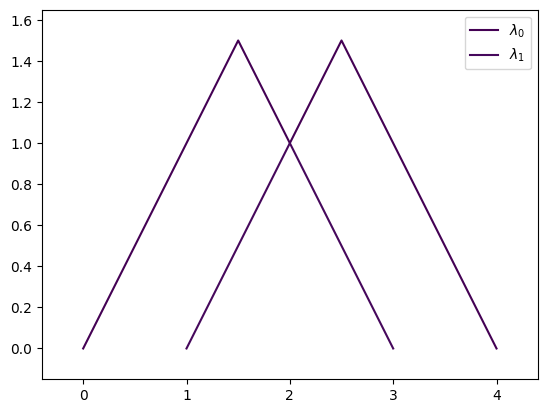

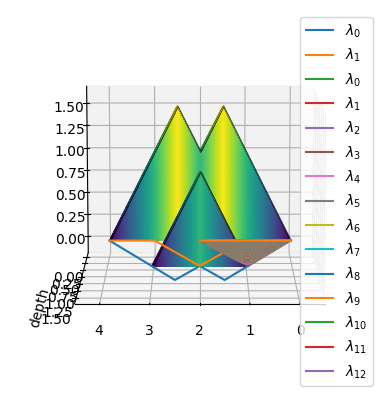

In [12]:
import numpy as np
from persim import PersLandscapeExact
from persim.landscapes import plot_landscape_simple
from persim import PersLandscapeApprox



pd = [np.array([[0, 3], [1, 4]]), np.array([[1, 4]])]

ple = PersLandscapeExact(dgms=pd, hom_deg=0)
print(ple.critical_pairs)

plot_landscape_simple(ple)

pla = PersLandscapeApprox(dgms=pd, hom_deg=0)

from persim.landscapes import plot_landscape, plot_landscape_simple

fig = plot_landscape(pla)
plot_landscape_simple(pla)
from numpy.random import default_rng

rng = default_rng(seed=42)

random_pds = [
    [
        np.array([
            [rng.random(), rng.random() + 1] for _ in range(500)
        ])
    ]  # extra bracketing to mimic the output of ripser.py
    for _ in range(100)]

from persim.landscapes import average_approx, lc_approx

pls = [PersLandscapeApprox(dgms=dgm, hom_deg=0) for dgm in random_pds]

avg_pl = average_approx(pls)
ax = plot_landscape_simple(avg_pl)
my_handles, my_labels = ax.get_legend_handles_labels()
ax.legend(handles=my_handles[:15])


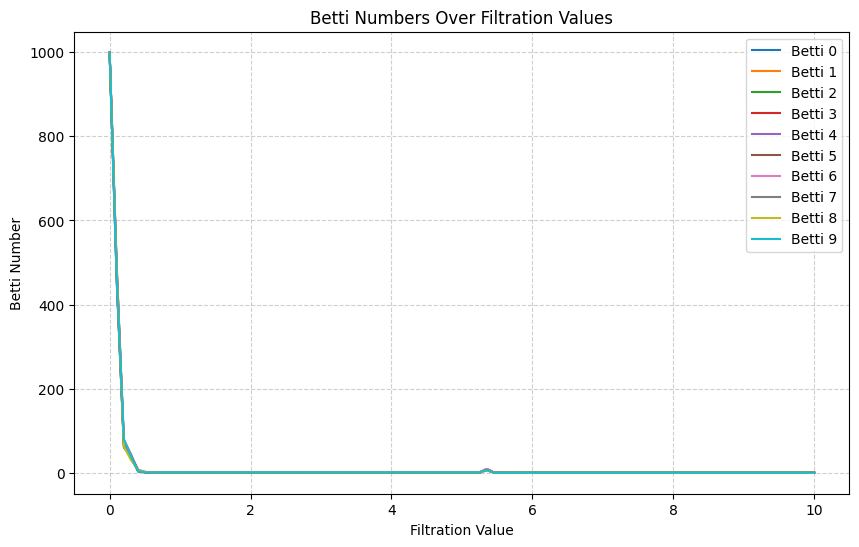

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def compute_betti_numbers(diagrams, filtration_value):
    """
    Compute Betti numbers at a given filtration value from persistence diagrams.

    Parameters
    ----------
    diagrams : list of numpy arrays
        Persistence diagrams for each homology dimension.
    filtration_value : float
        The filtration value at which to compute Betti numbers.

    Returns
    -------
    betti_numbers : list of int
        Betti numbers for each homology dimension.
    """
    betti_numbers = []
    for dgm in diagrams:
        # Count intervals where birth <= filtration_value < death
        betti = np.sum((dgm[:, 0] <= filtration_value) & (filtration_value < dgm[:, 1]))
        betti_numbers.append(betti)
    return betti_numbers

# Example: Compute Betti numbers for a range of filtration values
filtration_values = np.linspace(0, 10, 100)  # Adjust range and resolution as needed
betti_numbers_over_time = []

for filtration_value in filtration_values:
    betti_numbers = compute_betti_numbers(diagrams, filtration_value)
    betti_numbers_over_time.append(betti_numbers)

# Convert to a numpy array for easy manipulation
betti_numbers_over_time = np.array(betti_numbers_over_time)

# Plot Betti numbers over filtration values
plt.figure(figsize=(10, 6))
for dim in range(betti_numbers_over_time.shape[1]):
    plt.plot(filtration_values, betti_numbers_over_time[:, dim], label=f"Betti {dim}")

plt.title("Betti Numbers Over Filtration Values")
plt.xlabel("Filtration Value")
plt.ylabel("Betti Number")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

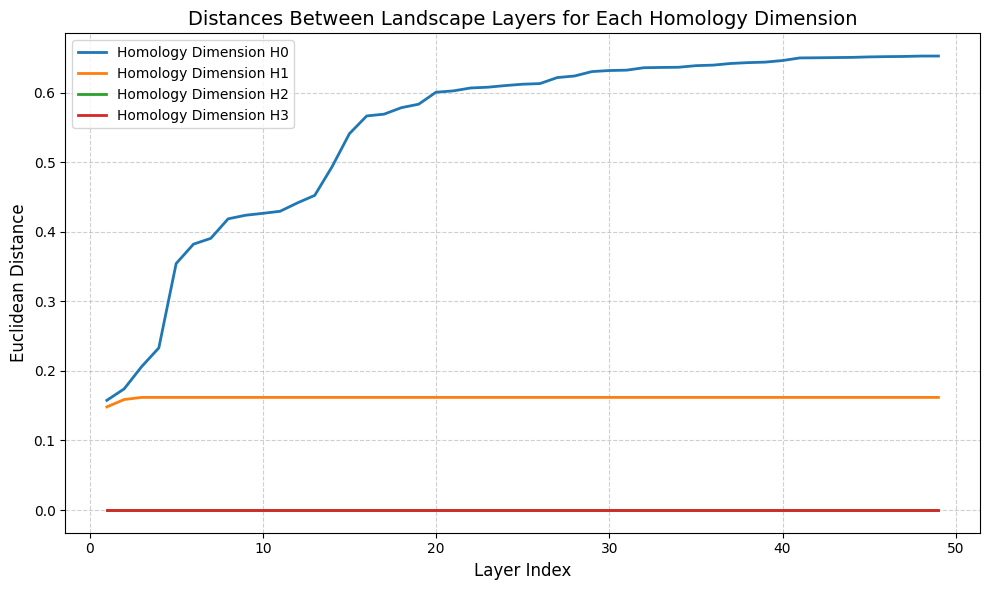

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceLandscape

# Generate example point cloud
num_points = 50
point_dim = 2
point_cloud = np.random.rand(num_points, point_dim)  # Single point cloud

# Compute persistence diagram
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2, 3])
dgms = VR.fit_transform([point_cloud])  # Single diagram

# Compute persistence landscapes for the diagram
n_layers = 50
n_homology = 4  # Number of homology dimensions (H0, H1)
landscape_transformer = PersistenceLandscape(n_layers=n_layers, n_bins=100)
landscapes = landscape_transformer.fit_transform(dgms)  # Shape: (1, n_layers * n_homology, n_bins)

# Plot distances for each homology dimension
plt.figure(figsize=(10, 6))
for hom_dim in range(n_homology):  # Separate landscapes for H0, H1, ...
    distances = []
    reference_layer = landscapes[0, hom_dim * n_layers, :]  # 0th layer for this homology dimension
    for layer in range(1, n_layers):  # Compare each layer to the 0th layer
        current_layer = landscapes[0, hom_dim * n_layers + layer, :]
        distance = np.linalg.norm(reference_layer - current_layer)  # Euclidean distance
        distances.append(distance)

    # Plot distances for the current homology dimension
    plt.plot(
        range(1, n_layers),
        distances,
        label=f"Homology Dimension H{hom_dim}",
        linewidth=2
    )

# Add labels, legend, and title
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.title("Distances Between Landscape Layers for Each Homology Dimension", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Point cloud dims: (5, 50, 4)
Persistence diagrams dims: (5, 74, 3)


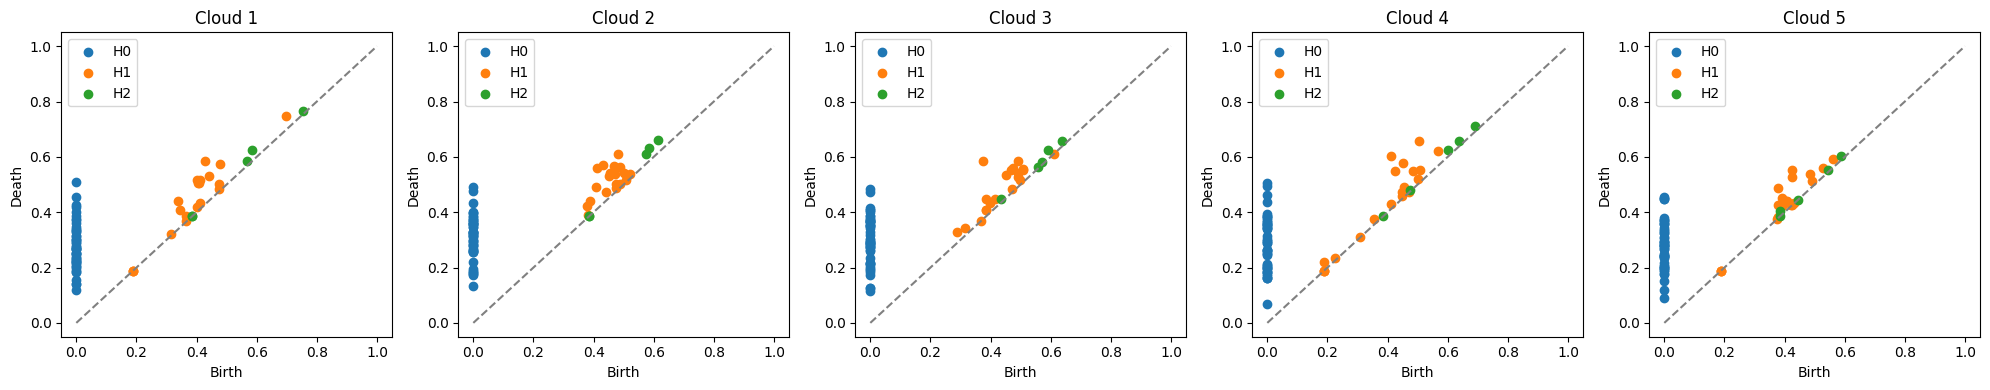

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import VietorisRipsPersistence

num_clouds = 5
num_points = 50
point_dim = 4
point_clouds = np.random.rand(num_clouds, num_points, point_dim)
homology_dimensions = [0, 1, 2]
print("Point cloud dims:", point_clouds.shape)

VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions)
dgms_multiple = VR.fit_transform(point_clouds)
print("Persistence diagrams dims:", dgms_multiple.shape)

fig, axs = plt.subplots(1, num_clouds, figsize=(20, 4), squeeze=False)
for i, (dgm, ax) in enumerate(zip(dgms_multiple, axs[0])):
    for h_dim in range(len(homology_dimensions)):  # Iterate over homology dimensions
        mask = dgm[:, 2] == homology_dimensions[h_dim]  # Filter points for the current dimension
        ax.scatter(dgm[mask, 0], dgm[mask, 1], label=f"H{homology_dimensions[h_dim]}")
    ax.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal
    ax.set_title(f"Cloud {i + 1}")
    ax.set_xlabel("Birth")
    ax.set_ylabel("Death")
    ax.legend()

plt.tight_layout()
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


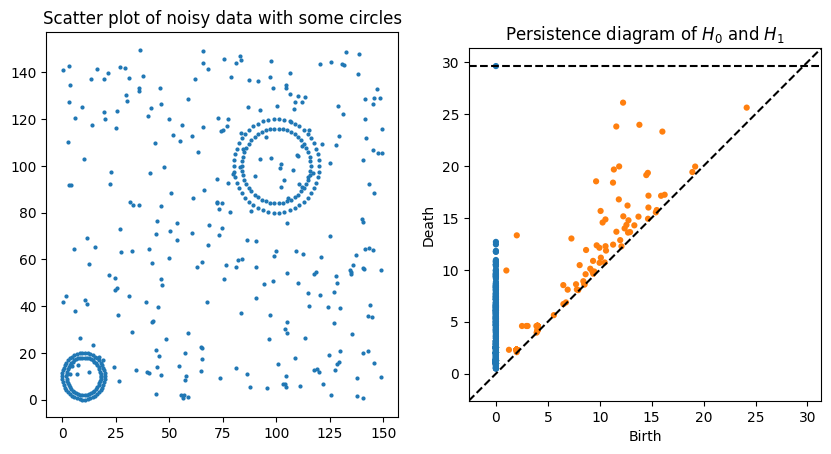

In [2]:
from ripser import Rips
from sklearn import datasets

data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)

plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()